# Student ID: 2200735

**You student_id is your 7/8 digit faser number.** 

This is a sample format for CE807: Assignment 2. You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes
4.   Other Method/model Codes, if any

**You must have `train_method1`, `test_method1` for method 1 and `train_method2`, `test_method2` for method 2 to perform full training and testing. This will be evaluated automatically, without this your code will fail and no marked.** 

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices. 

Before each `code cell`, you must have a `text cell` which explain what code cell is going to do. For each function/class, you need to properly document what are it's input, functionality and output. 

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`. 

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**. 
*   read dataset from './CE807/Assignment2/student_id/' folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './CE807/Assignment2/student_id/models/XXX/' where XXX = [1,2] for both models
*   at testing time you will load models from './CE807/Assignment2/student_id/models/XXX/' where XXX = [1,2] and then test on your data, and save the output in the same folder
*   For Data Size Effect, you model and output save directories are './CE807/Assignment2/student_id/models/XXX/YYY/' where XXX = [1,2] and YYY = [25,50, 75,100]
*   **Your output file based on the test file will be named `output_test.csv` and will have fields `id`, `tweet`, `label` and `out_label`** Note that, `id`, `tweet`, `label` come from `test.csv`, and `out_label` out_label your model’s output, where out_label =[OFF,NOT]. You need to save file in the respective model folders. 




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.7 MB/s eta 0:00:00


Let's import all require libraries. 
For example, `numpy`

In [3]:
import numpy as np
import os
import pandas as pd

**Let's put your student id as a variable, that you will use different places**

In [4]:
student_id = 2200735 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [6]:
# set same seeds for all libraries

#numpy seed
np.random.seed(student_id)

# Common Codes 

In this section you will write all common codes, for examples


*   Data read
*   Data Splitting
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

For examples, 

student_id = 1234567

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807/Assignment2/student_id/’ in your GDrive

now set all global variable, 
(Example for model 1 with 25% of data)

train_file = os.path.join(GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'train.csv')

MODEL_1_DIRECTORY = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH, ‘models’, ‘1’)

MODEL_1_25_DIRECTORY = os.path.join('MODEL_1_DIRECTORY',‘25’)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY,'output_test.csv')

Sample output directory and file structure: https://drive.google.com/drive/folders/1okgSzgGiwPYYFp7NScEt9MNVolOlld1d?usp=share_link   

In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [89]:
# Add your code to initialize GDrive and data and models paths

# TODO: Fill in the Google Drive path where you uploaded the assignment, data and code
# Example: If your student_id is 1234567 then your directory will be './CE807/Assignment2/1234567/' 

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

# Model 1 DIRECTORY PATH SETTING
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 60% of train data directory
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 50% of train data 
print('Output file name using model 1 using 50% of train data: ',model_1_50_output_test_file)

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75') # Model 1 trained using 75% of train data directory
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)

model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 75% of train data 
print('Output file name using model 1 using 75% of train data: ',model_1_75_output_test_file)

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 100% of train data directory
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)

model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 100% of train data 
print('Output file name using model 1 using 100% of train data: ',model_1_100_output_test_file)


# Model 2 DIRECTORY PATH SETTING
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 2 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 2 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_25_output_test_file)

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 2 trained using 50% of train data directory
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 50% of train data 
print('Output file name using model 2 using 50% of train data: ',model_2_50_output_test_file)

MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75') # Model 2 trained using 75% of train data directory
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)

model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 75% of train data 
print('Output file name using model 2 using 75% of train data: ',model_2_75_output_test_file)

MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 2 trained using 100% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 100% of train data 
print('Output file name using model 2 using 100% of train data: ',model_2_100_output_test_file)

# Model 3 DIRECTORY PATH SETTING
MODEL_3_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '3') # Model 3 directory
print('Model 3 directory: ', MODEL_3_DIRECTORY)

MODEL_3_25_DIRECTORY = os.path.join(MODEL_3_DIRECTORY,'25') # Model 3 trained using 25% of train data directory
print('Model 3 directory with 25% data: ', MODEL_3_25_DIRECTORY)

model_3_25_output_test_file = os.path.join(MODEL_3_25_DIRECTORY, 'output_test.csv') # Output file using Model 3 trained using 25% of train data 
print('Output file name using model 3 using 25% of train data: ',model_3_25_output_test_file)

MODEL_3_50_DIRECTORY = os.path.join(MODEL_3_DIRECTORY,'50') # Model 3 trained using 50% of train data directory
print('Model 3 directory with 50% data: ', MODEL_3_50_DIRECTORY)

model_3_50_output_test_file = os.path.join(MODEL_3_50_DIRECTORY, 'output_test.csv') # Output file using Model 3 trained using 50% of train data 
print('Output file name using model 3 using 50% of train data: ',model_3_50_output_test_file)

MODEL_3_75_DIRECTORY = os.path.join(MODEL_3_DIRECTORY,'75') # Model 3 trained using 75% of train data directory
print('Model 3 directory with 75% data: ', MODEL_3_75_DIRECTORY)

model_3_75_output_test_file = os.path.join(MODEL_3_75_DIRECTORY, 'output_test.csv') # Output file using Model 3 trained using 75% of train data 
print('Output file name using model 3 using 75% of train data: ',model_3_75_output_test_file)

MODEL_3_100_DIRECTORY = os.path.join(MODEL_3_DIRECTORY,'100') # Model 3 trained using 100% of train data directory
print('Model 3 directory with 100% data: ', MODEL_3_100_DIRECTORY)

model_3_100_output_test_file = os.path.join(MODEL_3_100_DIRECTORY, 'output_test.csv') # Output file using Model 3 trained using 100% of train data 
print('Output file name using model 3 using 100% of train data: ',model_3_100_output_test_file)

List files:  ['code.ipynb', 'glove.twitter.27B.25d.txt', 'glove.twitter.27B.50d.txt', 'glove.twitter.27B.200d.txt', 'models', 'test.csv', 'train.csv', 'valid.csv', 'train_1.csv', 'train_4.csv', 'train_3.csv', 'train_2.csv']
Train file:  gdrive/MyDrive/./CE807/Assignment2/2200735/train.csv
Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2200735/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2200735/models/1/25
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200735/models/1/25/output_test.csv
Model 1 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2200735/models/1/50
Output file name using model 1 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200735/models/1/50/output_test.csv
Model 1 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2200735/models/1/75
Output file name using model 1 using 75% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200735/models/1/75/out

Let's see train file

In [121]:
train_df = pd.read_csv(train_file)
train_df.head()

train_df.shape[0]

12313

Let's show you a sample output file. Notice all fields, `out_label` is your model's output for that `tweet` and `id`

In [10]:
df = pd.read_csv(model_1_25_output_test_file)
df.head()

,id,tweet,label,output_label
0,15923,democrat support antifa muslim brotherhood m i...,NOT,NOT
1,27014,revered conservative hated progressivessociali...,OFF,OFF
2,30530,first reduces ca url,OFF,OFF
3,13876,getting news still parole always make smile fi...,OFF,OFF
4,60133,unity demo oppose farright enough enough url,NOT,OFF


In [11]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We are going to use different performance matrics like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation. We will print all the matrics and display Confusion Matrix with proper X & Y axis labels

compute_performance code reference: https://scikit-learn.org/stable/modules/model_evaluation.html

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

def compute_performance(y_true, y_pred):
    # Compute the confusion matrix and performance metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    # Print the performance metrics
    print(f"Training Data Accuracy: {accuracy:.2f}")
    print(f"Training Data Precision: {precision:.2f}")
    print(f"Training Data Recall: {recall:.2f}")
    print(f"Training Data F1 score: {f1:.2f}")


# Method 1 Start

In this section you will write all details of your Method 1. 

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset 
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement. 

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


### Data Reading

The following code divides the dataset into 4 subsets and copy them to the directory. The four subsets are 25%, 50%, 75% and 100% of the training data.

In [32]:
from sklearn.model_selection import train_test_split

# Load the training dataset
train_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2200735/train.csv')

# Save the subsets to Google Drive Path
for i, size in enumerate([0.25, 0.5, 0.75, 0.9]):
    # Ensure that the test_size is not zero
    if size == 0.9:
        train_subset = train_data.copy()
    else:
        # Split the data into train and test sets
        train_subset, _ = train_test_split(train_data, test_size=1-size, stratify=train_data['label'])

    # Save the train subset to Google Drive Path
    train_subset.to_csv(f'/content/gdrive/MyDrive/CE807/Assignment2/2200735/train_{i+1}.csv', index=False)



### Data Cleaning 

The following code cleans the training dataset containing tweets by removing duplicates and null values. It further refines the tweet data by removing the regex that contains user mentions, hastags, special characters that can be emoticons or symbols and finally tokenise them and remove the stop words from it. Finally the 'label' is coverted to 0/1 where 0 indicating 'Not Offensive' and 1 indicating 'Offensive'.

clean_data code reference: 
1. https://docs.python.org/3/library/re.html
2. https://www.nltk.org/howto/wordnet.html
3. https://www.nltk.org/search.html?q=stopwords&check_keywords=yes&area=default
4. https://www.nltk.org/_modules/nltk/tokenize/punkt.html


In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove user mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    
    # Remove non-alphabetic characters and convert to lowercase
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet).lower()
    
    # Tokenize tweet
    tokens = word_tokenize(tweet)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if not t in stop_words]
    

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    # Return cleaned tweet
    return ' '.join(tokens)

def clean_data(train_file):
    # Read the data csv
    train_data = pd.read_csv(train_file, sep=',')

    # Handle missing data
    train_data.dropna(inplace=True)
    # Handle duplicate data
    train_data.drop_duplicates(inplace=True)

    # Clean text data in 'tweet' column
    train_data['tweet'] = train_data['tweet'].apply(clean_tweet)
    # Convert the text labels into binary labels [0 - Not Offensive, 1 - Offensive]
    train_data['label'] = train_data['label'].apply(lambda x: 0 if x == 'NOT' else 1)

    return train_data


## Training Method 1 Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best. 

train_method1 code reference:
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
2. https://scikit-learn.org/stable/model_persistence.html
3. https://scikit-learn.org/stable/modules/svm.html
4. https://stackoverflow.com/questions/74822888/the-most-import-features-for-a-svm-text-classification-with-python-and-scikit-le
5. https://stackoverflow.com/questions/50298547/poor-probability-results-for-svm-text-classification


In [34]:
import os
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

def train_method1(train_data, val_data, model_dir):
    # Extract the tweet and label data from train and validation sets
    train_tweet = train_data['tweet']
    train_label = train_data['label']
    val_tweet = val_data['tweet']
    val_label = val_data['label']

    # Create a TfidfVectorizer and fit it on the training data
    vectorizer = TfidfVectorizer()
    train_tweet_matrix = vectorizer.fit_transform(train_tweet)

    # Convert the validation tweets into a document-term matrix using the fitted TfidfVectorizer
    val_tweet_matrix = vectorizer.transform(val_tweet)

    # Train an SVM model on the training set
    clf = svm.SVC(kernel='linear')
    clf.fit(train_tweet_matrix, train_label)
    
    # Predict the labels for training and validation sets
    train_pred = clf.predict(train_tweet_matrix)
    val_pred = clf.predict(val_tweet_matrix)

    # Calculate the accuracy of the model on the validation set
    val_accuracy = accuracy_score(val_label, val_pred)
    print(f"Validation accuracy: {val_accuracy}")

    # Calculate the y_pred and y_true for training set
    y_pred = train_pred
    y_true = train_label

    # Evaluate the model performance
    compute_performance(y_true, y_pred)

    # Save the trained model and vectorizer
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    model_path = os.path.join(model_dir, "svm_model.joblib")
    joblib.dump(clf, model_path)
    vectorizer_path = os.path.join(model_dir, "vectorizer.joblib")
    joblib.dump(vectorizer, vectorizer_path)

    return val_accuracy


## Testing Method 1 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [68]:
from sklearn.metrics import accuracy_score, classification_report

def test_method1(test_data, model_file, model_dir):

    # Load the saved SVM model and vectorizer
    model_path = os.path.join(model_file)
    clf = joblib.load(model_path)
    vectorizer_path = os.path.join(model_dir, "vectorizer.joblib")
    vectorizer = joblib.load(vectorizer_path)

    # Extract the tweet and label data from the test set
    test_tweet = test_data['tweet']
    y_true = test_data['label']

    # Convert the test tweets into a document-term matrix using the fitted TfidfVectorizer
    test_tweet_matrix = vectorizer.transform(test_tweet)

    # Predict the labels for the test set
    y_pred = clf.predict(test_tweet_matrix)


    # Add a new column with predicted labels to the test data DataFrame
    test_data['output_label'] = y_pred
    # Convert the text labels into original labels [0 - Not Offensive, 1 - Offensive]
    test_data['label'] = test_data['label'].apply(lambda x: 'NOT' if x == 1 else 'OFF')
    test_data['output_label'] = test_data['output_label'].apply(lambda x: 'NOT' if x == 1 else 'OFF')
    # Save the test data DataFrame with predicted labels to a new output file CSV
    output_file = os.path.join(model_dir, "output_test.csv")
    test_data.to_csv(output_file, index=False)

    # Calculate the accuracy of the model on the test set
    test_acc = accuracy_score(y_true, y_pred)
    test_report = classification_report(y_true, y_pred)
    print(f"Test accuracy: {test_acc}")
    print(f"Test classification report:\n{test_report}")

    # Confusion matrix for test 
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Generate a plot of the confusion matrix using Seaborn
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')

    # Set the axis labels and plot title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix on Test Data')

    # Show the plot
    plt.show()

    return test_acc


## Method 1 End


# Method 2 Start

In this section you will write all details of your Method 2.
 
You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset 
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement. 

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


## Training Method 2 Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best. 

In [19]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


train_method2 code reference: 
1. tensorflow.keras.layers:

- Embedding: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding 
- Conv1D: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D
- GlobalMaxPooling1D: https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPooling1D
- Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
2. tensorflow.keras.models:
- Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential
3. tensorflow.keras.callbacks:
- ModelCheckpoint: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
4. https://stackoverflow.com/questions/64206715/tensorflow-tokeniser-the-maximum-number-of-words-to-keep
5. https://faroit.com/keras-docs/2.0.2/getting-started/sequential-model-guide/
6. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
7. https://www.kaggle.com/code/doomdiskday/full-tutoria-eda-to-ensembles-embeddings-zoo

In [105]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

def train_method2(train_data, val_data, model_dir):
    
    # Set hyperparameters
    vocab_size = 10000 # maximum number of words to keep, based on word frequency
    embedding_dim = 100 # dimension of embedding vector for each token
    max_length = 50 # maximum length of input sequence
    num_filters = 64 # number of convolutional filters
    filter_size = 3 # size of convolutional filters
    epochs = 10 # number of training epochs
    batch_size = 32 # size of mini-batch
    
    # Preprocess input data
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(train_data["tweet"])
    X_train = tokenizer.texts_to_sequences(train_data["tweet"])
    X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post')
    y_train = train_data["label"]
    
    X_val = tokenizer.texts_to_sequences(val_data["tweet"])
    X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_length, padding='post')
    y_val = val_data["label"]
    
    # Define model architecture
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train model
    filepath = model_dir + "/model.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[checkpoint])
    
    # Save model
    model.save(filepath)
    
    # Print training history
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5).astype(int)
    y_true = y_val

    compute_performance(y_true, y_pred)
    
    print("Validation loss:", val_loss)
    print("Validation accuracy:", val_acc)

    return val_acc[-1]

## Testing Method 2 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [81]:
def test_method2(test_data, model_file, model_dir):
    # Load model
    model = tf.keras.models.load_model(model_file)
    
    # Preprocess test data
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(test_data["tweet"])
    X_test = tokenizer.texts_to_sequences(test_data["tweet"])
    X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=50, padding='post')
    y_test = test_data["label"]
    
    # Evaluate model
    loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    print("Test loss:", loss)
    print("Test accuracy:", test_acc)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    y_true = y_test
    
    # Compute performance metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    # Print the performance metrics
    print(f"Test Data Accuracy: {accuracy:.2f}")
    print(f"Test Data Precision: {precision:.2f}")
    print(f"Test Data Recall: {recall:.2f}")
    print(f"Test Data F1 score: {f1:.2f}")

    # Generate a plot of the confusion matrix using Seaborn
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')

    # Set the axis labels and plot title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix on Test Data')

    # Show the plot
    plt.show()
    
    # Add predicted labels to the test_data dataframe
    test_data["output_label"] = y_pred
    # Convert the text labels into original labels [0 - Not Offensive, 1 - Offensive]
    test_data['label'] = test_data['label'].apply(lambda x: 'NOT' if x == 1 else 'OFF')
    test_data['output_label'] = test_data['output_label'].apply(lambda x: 'NOT' if x == 1 else 'OFF')
    
    # Save the test_data dataframe to a new CSV file with the predicted labels
    output_path = os.path.join(model_dir, "output_test.csv")
    test_data.to_csv(output_path, index=False)
    return test_acc

## Method 2 End


## Method 3 Start

Traingn Method 3 is a modification for the Traing Method 2 with an addition of embedded file from the **GloVe data**.

GloVe: https://nlp.stanford.edu/projects/glove/

Other references to the train_method3 code:
1. https://pypi.org/project/gensim/
2. https://stackoverflow.com/questions/59533346/keras-word-embedding-matrix-has-first-row-of-zeros
3. https://python.hotexamples.com/examples/keras_preprocessing.text/Tokenizer/texts_to_sequences/python-tokenizer-texts_to_sequences-method-examples.html

In [104]:
import gensim
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
    
def load_pretrained_embeddings(embedding_file, vocab_size, embedding_dim, word_index):
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(embedding_file) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

def train_method3(train_data, val_data, model_dir):
    
    # Set hyperparameters
    vocab_size = 50000 # maximum number of words to keep, based on word frequency
    embedding_dim = 100 # dimension of embedding vector for each token
    max_length = 50 # maximum length of input sequence
    num_filters = 64 # number of convolutional filters
    filter_size = 3 # size of convolutional filters
    epochs = 10 # number of training epochs
    batch_size = 32 # size of mini-batch
    
    # Preprocess input data
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(train_data["tweet"])
    word_index = tokenizer.word_index
    
    X_train = tokenizer.texts_to_sequences(train_data["tweet"])
    X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post')
    y_train = train_data["label"]
    
    X_val = tokenizer.texts_to_sequences(val_data["tweet"])
    X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_length, padding='post')
    y_val = val_data["label"]
    # Load pre-trained embedding
    embedding_file = "/content/gdrive/MyDrive/CE807/Assignment2/2200735/glove.twitter.27B.200d.txt"
    # Load pre-trained word embeddings
    embedding_matrix = load_pretrained_embeddings(embedding_file, vocab_size, embedding_dim, word_index)
    
    # Define model architecture
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False))
    model.add(Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train model
    filepath = model_dir + "/model.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[checkpoint])
    
    # Save model
    model.save(filepath)
    
    # Print training history
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5).astype(int)
    y_true = y_val

    compute_performance(y_true, y_pred)
    
    print("Validation loss:", val_loss)
    print("Validation accuracy:", val_acc)


    return val_acc[-1]


## Test Method 3

In [87]:
def test_method3(test_data, model_file, model_dir):
    # Load model
    model = tf.keras.models.load_model(model_file)
    
    # Preprocess test data
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(test_data["tweet"])
    word_index = tokenizer.word_index
    X_test = tokenizer.texts_to_sequences(test_data["tweet"])
    X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=50, padding='post')
    y_true = test_data["label"]
    
    # Evaluate model on test data
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    
    # Compute performance metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    test_acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    # Print the performance metrics
    print(f"Test Data Accuracy: {test_acc:.2f}")
    print(f"Test Data Precision: {precision:.2f}")
    print(f"Test Data Recall: {recall:.2f}")
    print(f"Test Data F1 score: {f1:.2f}")

    # Generate a plot of the confusion matrix using Seaborn
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')

    # Set the axis labels and plot title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix on Train Data')

    # Show the plot
    plt.show()
    
    # Add predicted labels to the test_data dataframe
    test_data["output_label"] = y_pred
    # Convert the text labels into original labels [0 - Not Offensive, 1 - Offensive]
    test_data['label'] = test_data['label'].apply(lambda x: 'NOT' if x == 1 else 'OFF')
    test_data['output_label'] = test_data['output_label'].apply(lambda x: 'NOT' if x == 1 else 'OFF')
    
    # Save the test_data dataframe to a new CSV file with the predicted labels
    output_path = os.path.join(model_dir, "output_test.csv")
    test_data.to_csv(output_path, index=False)

    return test_acc


## Method 3 End

### Train Method 1 Code Run for Different Subsets [25%, 50%, 75%, 100%]

In [74]:
#cleaning validation set file
val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
val_data = clean_data(val_file)
# Code run for different subsets of the training data
val_accuracy_list_1 = []

train_25_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_1.csv')
train_25_data = clean_data(train_25_file)

val_accuracy_25 = train_method1(train_25_data, val_data, MODEL_1_25_DIRECTORY)
val_accuracy_list_1.append(val_accuracy_25*100)

print("-----------------Train Method 1 on [25%] end here----------------")

train_50_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_2.csv')
train_50_data = clean_data(train_50_file)

val_accuracy_50 = train_method1(train_50_data, val_data, MODEL_1_50_DIRECTORY)
val_accuracy_list_1.append(val_accuracy_50*100)
print("-----------------Train Method 1 on [50%] end here----------------")

train_75_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_3.csv')
train_75_data = clean_data(train_75_file)

val_accuracy_75 = train_method1(train_75_data, val_data, MODEL_1_75_DIRECTORY)
val_accuracy_list_1.append(val_accuracy_75*100)
print("-----------------Train Method 1 on [75%] end here----------------")

train_100_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_4.csv')
train_100_data = clean_data(train_100_file)


val_accuracy_100 = train_method1(train_100_data, val_data, MODEL_1_100_DIRECTORY)
val_accuracy_list_1.append(val_accuracy_100*100)
print("-----------------Train Method 1 on [100%] end here----------------")



Validation accuracy: 0.7389428263214671
Training Data Accuracy: 0.91
Training Data Precision: 0.93
Training Data Recall: 0.87
Training Data F1 score: 0.89
-----------------Train Method 1 on [25%] end here----------------
Validation accuracy: 0.7486515641855448
Training Data Accuracy: 0.89
Training Data Precision: 0.91
Training Data Recall: 0.84
Training Data F1 score: 0.87
-----------------Train Method 1 on [50%] end here----------------
Validation accuracy: 0.7680690399137001
Training Data Accuracy: 0.88
Training Data Precision: 0.90
Training Data Recall: 0.83
Training Data F1 score: 0.85
-----------------Train Method 1 on [75%] end here----------------
Validation accuracy: 0.7680690399137001
Training Data Accuracy: 0.87
Training Data Precision: 0.89
Training Data Recall: 0.82
Training Data F1 score: 0.84
-----------------Train Method 1 on [100%] end here----------------


### Test Method 1 Code Run for Different Subsets [25%, 50%, 75%, 100%]





Test accuracy: 0.7767441860465116
Test classification report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       620
           1       0.70      0.35      0.47       240

    accuracy                           0.78       860
   macro avg       0.74      0.65      0.66       860
weighted avg       0.76      0.78      0.75       860



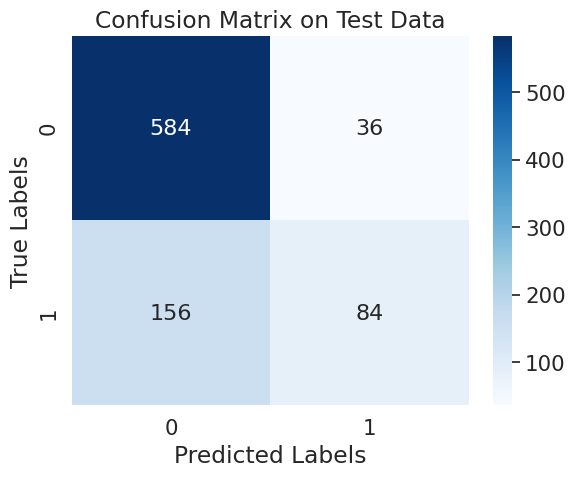

-----------------Test Method 1 on [25%] end here----------------


In [75]:
test_accuracy_list_1 = []

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_1_25_DIRECTORY, 'svm_model.joblib')
test_data = clean_data(test_file)
test_accuracy_25 = test_method1(test_data, model_file, MODEL_1_25_DIRECTORY)
test_accuracy_list_1.append(test_accuracy_25*100)
print("-----------------Test Method 1 on [25%] end here----------------")

Test accuracy: 0.8104651162790698
Test classification report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       620
           1       0.79      0.44      0.56       240

    accuracy                           0.81       860
   macro avg       0.80      0.70      0.72       860
weighted avg       0.81      0.81      0.79       860



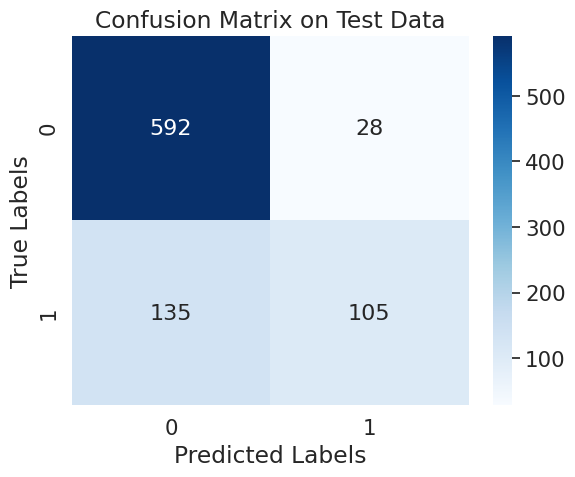

-----------------Test Method 1 on [50%] end here----------------


In [76]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
test_data = clean_data(test_file)
model_file = os.path.join(MODEL_1_50_DIRECTORY, 'svm_model.joblib')
test_accuracy_50 = test_method1(test_data, model_file, MODEL_1_50_DIRECTORY)
test_accuracy_list_1.append(test_accuracy_50*100)
print("-----------------Test Method 1 on [50%] end here----------------")


Test accuracy: 0.813953488372093
Test classification report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       620
           1       0.80      0.45      0.57       240

    accuracy                           0.81       860
   macro avg       0.81      0.70      0.73       860
weighted avg       0.81      0.81      0.79       860



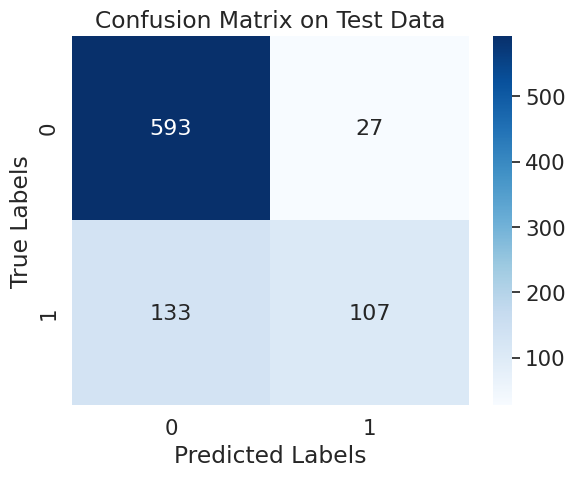

-----------------Test Method 1 on [75%] end here----------------


In [77]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
test_data = clean_data(test_file)
model_file = os.path.join(MODEL_1_75_DIRECTORY, 'svm_model.joblib')
test_accuracy_75 = test_method1(test_data, model_file, MODEL_1_75_DIRECTORY)
test_accuracy_list_1.append(test_accuracy_75*100)
print("-----------------Test Method 1 on [75%] end here----------------")


Test accuracy: 0.8116279069767441
Test classification report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       620
           1       0.77      0.46      0.58       240

    accuracy                           0.81       860
   macro avg       0.80      0.70      0.73       860
weighted avg       0.81      0.81      0.79       860



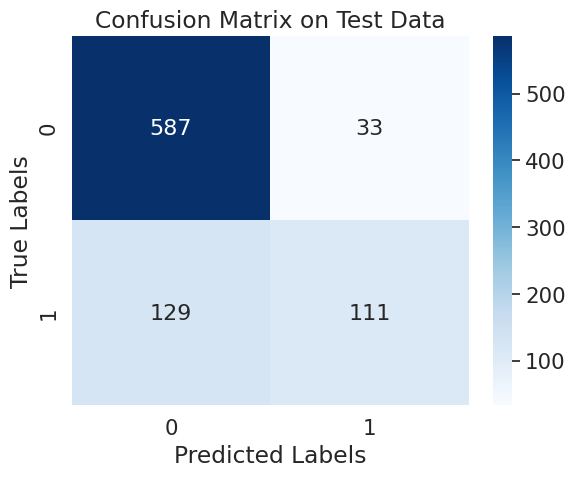

-----------------Test Method 1 on [100%] end here----------------


In [78]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
test_data = clean_data(test_file)
model_file = os.path.join(MODEL_1_100_DIRECTORY, 'svm_model.joblib')
test_accuracy_100 = test_method1(test_data, model_file, MODEL_1_100_DIRECTORY)
test_accuracy_list_1.append(test_accuracy_100*100)
print("-----------------Test Method 1 on [100%] end here----------------")

### Train Method 2 Code Run for Different Subsets [25%, 50%, 75%, 100%]


In [106]:
val_accuracy_list_2 = []
val_accuracy_25 = train_method2(train_25_data, val_data, MODEL_2_25_DIRECTORY)
val_accuracy_list_2.append(val_accuracy_25*100)
print("-----------------Train Method 2 on [25%] end here----------------")

val_accuracy_50 = train_method2(train_50_data, val_data, MODEL_2_50_DIRECTORY)
val_accuracy_list_2.append(val_accuracy_50*100)
print("-----------------Train Method 2 on [50%] end here----------------")

val_accuracy_75 = train_method2(train_75_data, val_data, MODEL_2_75_DIRECTORY)
val_accuracy_list_2.append(val_accuracy_75*100)
print("-----------------Train Method 2 on [75%] end here----------------")

val_accuracy_100 = train_method2(train_100_data, val_data, MODEL_2_100_DIRECTORY)
val_accuracy_list_2.append(val_accuracy_100*100)
print("-----------------Train Method 2 on [100%] end here----------------")


Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.6317 - accuracy: 0.6673
Epoch 1: val_accuracy improved from -inf to 0.66990, saving model to gdrive/MyDrive/./CE807/Assignment2/2200735/models/2/25/model.h5
97/97 [==============================] - 5s 37ms/step - loss: 0.6317 - accuracy: 0.6673 - val_loss: 0.6149 - val_accuracy: 0.6699
Epoch 2/10
95/97 [============================>.] - ETA: 0s - loss: 0.5133 - accuracy: 0.7355
Epoch 2: val_accuracy improved from 0.66990 to 0.75405, saving model to gdrive/MyDrive/./CE807/Assignment2/2200735/models/2/25/model.h5
97/97 [==============================] - 2s 25ms/step - loss: 0.5126 - accuracy: 0.7355 - val_loss: 0.5283 - val_accuracy: 0.7540
Epoch 3/10
96/97 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.8910
Epoch 3: val_accuracy did not improve from 0.75405
97/97 [==============================] - 2s 24ms/step - loss: 0.2994 - accuracy: 0.8912 - val_loss: 0.5506 - val_accuracy: 0.7540
Epoch 4/

### Test Method 2 Code Run for Different Subsets [25%, 50%, 75%, 100%]


27/27 [==============================] - 0s 4ms/step - loss: 1.6900 - accuracy: 0.6000
Test loss: 1.6900275945663452
Test accuracy: 0.6000000238418579
27/27 [==============================] - 0s 5ms/step
Test Data Accuracy: 0.60
Test Data Precision: 0.49
Test Data Recall: 0.49
Test Data F1 score: 0.49


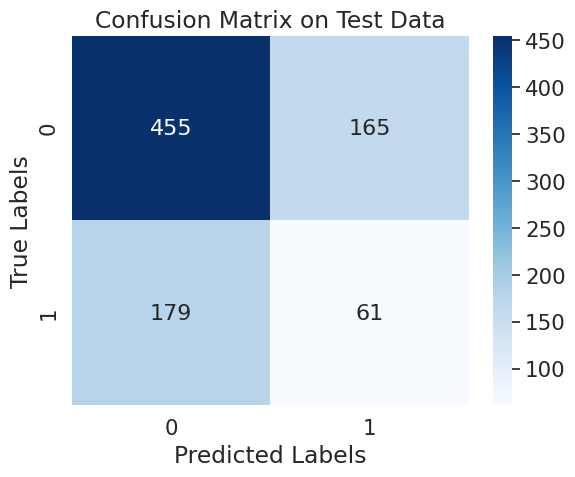

-----------------Test Method 2 on [25%] end here----------------


In [107]:
test_accuracy_list_2 = []
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_2_25_DIRECTORY, 'model.h5')
test_data = clean_data(test_file)
test_accuracy_25 = test_method2(test_data, model_file, MODEL_2_25_DIRECTORY)
test_accuracy_list_2.append(test_accuracy_25*100)

print("-----------------Test Method 2 on [25%] end here----------------")

27/27 [==============================] - 0s 5ms/step - loss: 2.2256 - accuracy: 0.5849
Test loss: 2.225593090057373
Test accuracy: 0.5848837494850159
27/27 [==============================] - 0s 3ms/step
Test Data Accuracy: 0.58
Test Data Precision: 0.47
Test Data Recall: 0.47
Test Data F1 score: 0.47


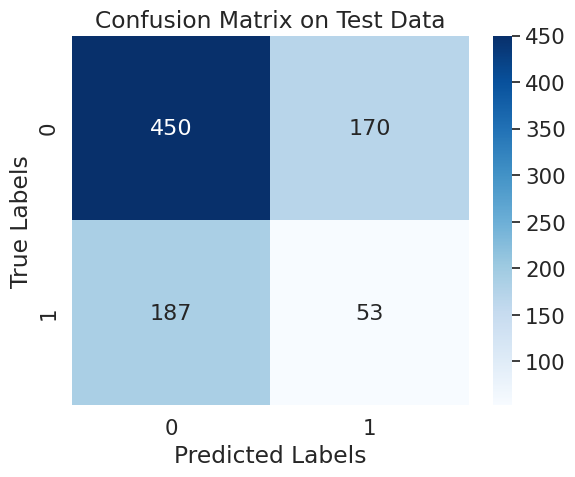

-----------------Test Method 2 on [50%] end here----------------


In [108]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_2_50_DIRECTORY, 'model.h5')
test_data = clean_data(test_file)
test_accuracy_50 = test_method2(test_data, model_file, MODEL_2_50_DIRECTORY)
test_accuracy_list_2.append(test_accuracy_50*100)

print("-----------------Test Method 2 on [50%] end here----------------")

27/27 [==============================] - 0s 4ms/step - loss: 2.1923 - accuracy: 0.5756
Test loss: 2.1922855377197266
Test accuracy: 0.5755813717842102
27/27 [==============================] - 0s 4ms/step
Test Data Accuracy: 0.58
Test Data Precision: 0.49
Test Data Recall: 0.49
Test Data F1 score: 0.49


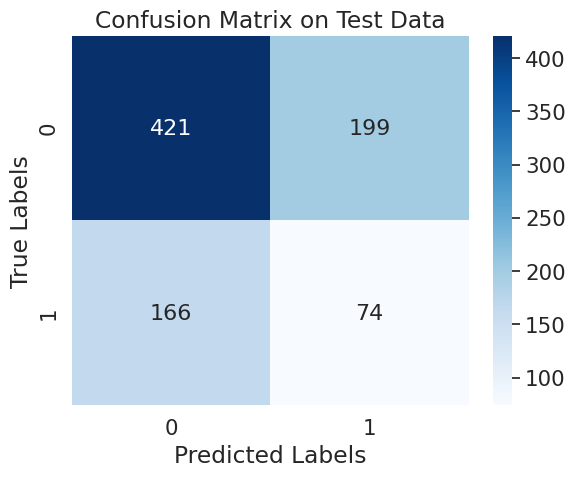

-----------------Test Method 2 on [75%] end here----------------


In [109]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_2_75_DIRECTORY, 'model.h5')
test_data = clean_data(test_file)
test_accuracy_75 = test_method2(test_data, model_file, MODEL_2_75_DIRECTORY)
test_accuracy_list_2.append(test_accuracy_75*100)

print("-----------------Test Method 2 on [75%] end here----------------")

27/27 [==============================] - 0s 7ms/step - loss: 2.2842 - accuracy: 0.5663
Test loss: 2.284238576889038
Test accuracy: 0.5662790536880493
27/27 [==============================] - 0s 6ms/step
Test Data Accuracy: 0.57
Test Data Precision: 0.48
Test Data Recall: 0.48
Test Data F1 score: 0.48


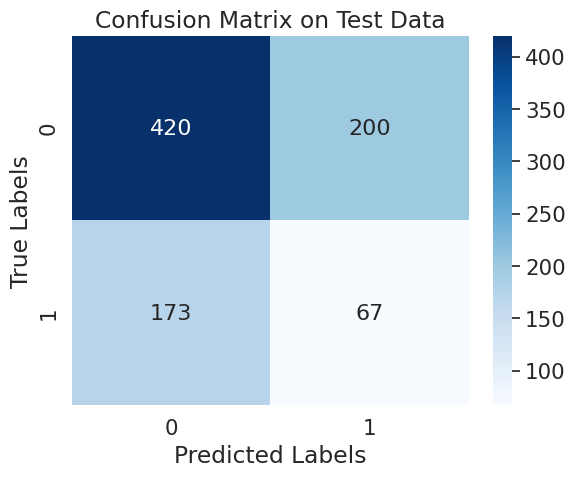

-----------------Test Method 2 on [100%] end here----------------


In [110]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_2_100_DIRECTORY, 'model.h5')
test_data = clean_data(test_file)
test_accuracy_100 = test_method2(test_data, model_file, MODEL_2_100_DIRECTORY)
test_accuracy_list_2.append(test_accuracy_100*100)

print("-----------------Test Method 2 on [100%] end here----------------")

### Train Method 3 Code Run for Different Subsets [25%, 50%, 75%, 100%]


In [111]:
val_accuracy_list_3 = []
val_accuracy_25 = train_method2(train_25_data, val_data, MODEL_3_25_DIRECTORY)
val_accuracy_list_3.append(val_accuracy_25*100)
print("-----------------Train Method 3 on [25%] end here----------------")

val_accuracy_50 = train_method2(train_50_data, val_data, MODEL_3_50_DIRECTORY)
val_accuracy_list_3.append(val_accuracy_50*100)
print("-----------------Train Method 3 on [50%] end here----------------")

val_accuracy_75 = train_method2(train_75_data, val_data, MODEL_3_75_DIRECTORY)
val_accuracy_list_3.append(val_accuracy_75*100)
print("-----------------Train Method 3 on [75%] end here----------------")

val_accuracy_100 = train_method2(train_100_data, val_data, MODEL_3_100_DIRECTORY)
val_accuracy_list_3.append(val_accuracy_100*100)
print("-----------------Train Method 3 on [100%] end here----------------")


Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.6318 - accuracy: 0.6676
Epoch 1: val_accuracy improved from -inf to 0.66775, saving model to gdrive/MyDrive/./CE807/Assignment2/2200735/models/3/25/model.h5
97/97 [==============================] - 3s 26ms/step - loss: 0.6318 - accuracy: 0.6676 - val_loss: 0.6160 - val_accuracy: 0.6677
Epoch 2/10
97/97 [==============================] - ETA: 0s - loss: 0.5225 - accuracy: 0.7313
Epoch 2: val_accuracy improved from 0.66775 to 0.74002, saving model to gdrive/MyDrive/./CE807/Assignment2/2200735/models/3/25/model.h5
97/97 [==============================] - 3s 26ms/step - loss: 0.5225 - accuracy: 0.7313 - val_loss: 0.5349 - val_accuracy: 0.7400
Epoch 3/10
95/97 [============================>.] - ETA: 0s - loss: 0.3056 - accuracy: 0.8849
Epoch 3: val_accuracy improved from 0.74002 to 0.75620, saving model to gdrive/MyDrive/./CE807/Assignment2/2200735/models/3/25/model.h5
97/97 [==============================] - 3s 34ms/step

### Test Method 3 Code Run for Different Subsets [25%, 50%, 75%, 100%]


27/27 [==============================] - 0s 4ms/step
Test Data Accuracy: 0.60
Test Data Precision: 0.51
Test Data Recall: 0.51
Test Data F1 score: 0.51


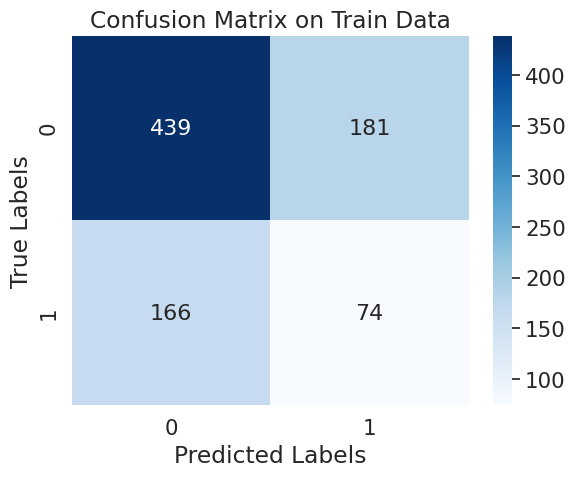

-----------------Test Method 3 on [25%] end here----------------


In [112]:
test_accuracy_list_3 = []
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_3_25_DIRECTORY, 'model.h5')
test_data = clean_data(test_file)
test_accuracy_25 = test_method3(test_data, model_file, MODEL_3_25_DIRECTORY)
test_accuracy_list_3.append(test_accuracy_25*100)
print("-----------------Test Method 3 on [25%] end here----------------")


27/27 [==============================] - 0s 4ms/step
Test Data Accuracy: 0.57
Test Data Precision: 0.47
Test Data Recall: 0.47
Test Data F1 score: 0.47


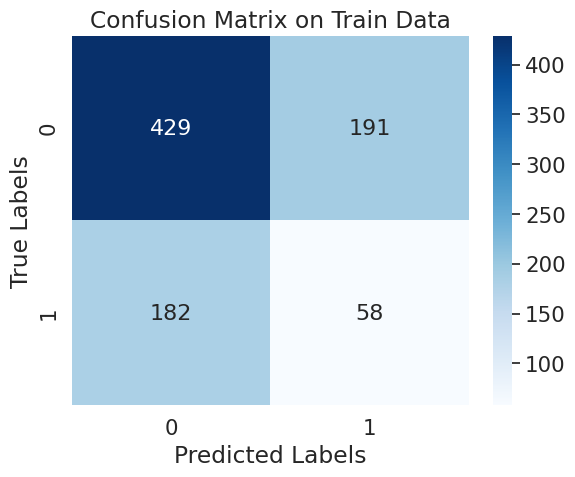

-----------------Test Method 3 on [50%] end here----------------


In [113]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_3_50_DIRECTORY, 'model.h5')
test_data = clean_data(test_file)
test_accuracy_50 = test_method3(test_data, model_file, MODEL_3_50_DIRECTORY)
test_accuracy_list_3.append(test_accuracy_50*100)
print("-----------------Test Method 3 on [50%] end here----------------")

27/27 [==============================] - 0s 3ms/step
Test Data Accuracy: 0.56
Test Data Precision: 0.48
Test Data Recall: 0.48
Test Data F1 score: 0.48


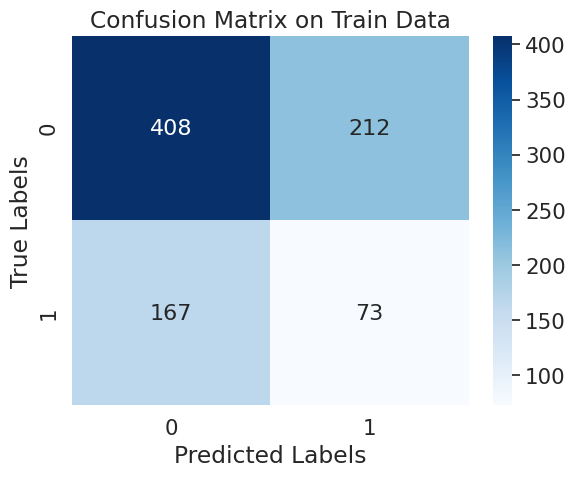

-----------------Test Method 3 on [75%] end here----------------


In [114]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_3_75_DIRECTORY, 'model.h5')
test_data = clean_data(test_file)
test_accuracy_75 = test_method3(test_data, model_file, MODEL_3_75_DIRECTORY)
test_accuracy_list_3.append(test_accuracy_75*100)
print("-----------------Test Method 3 on [75%] end here----------------")

27/27 [==============================] - 0s 4ms/step
Test Data Accuracy: 0.59
Test Data Precision: 0.48
Test Data Recall: 0.48
Test Data F1 score: 0.48


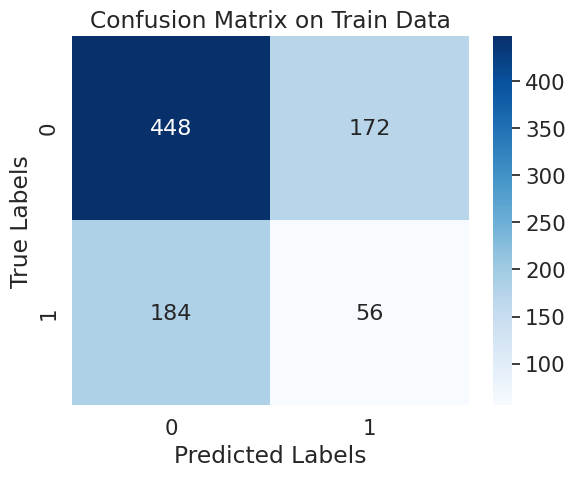

-----------------Test Method 3 on [100%] end here----------------


In [115]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
model_file = os.path.join(MODEL_3_100_DIRECTORY, 'model.h5')
test_data = clean_data(test_file)
test_accuracy_100 = test_method3(test_data, model_file, MODEL_3_100_DIRECTORY)
test_accuracy_list_3.append(test_accuracy_100*100)
print("-----------------Test Method 3 on [100%] end here----------------")

## Performance Plots for the Methods


In [116]:
def accuracy_plot(validation_accuracy, test_accuracy, method):
  data_size = [25, 50, 75, 100]
  # Create a DataFrame for the accuracy data
  df = pd.DataFrame({'Dataset Size': data_size,
                    'Validation Accuracy': validation_accuracy,
                    'Test Accuracy': test_accuracy})

  # Melt the DataFrame to convert it from wide to long format
  df = pd.melt(df, id_vars=['Dataset Size'], var_name='Accuracy Type',
              value_name='Accuracy')

  # Plot the accuracy data using Seaborn
  sns.set(style='whitegrid')
  sns.lineplot(x='Dataset Size', y='Accuracy', hue='Accuracy Type', data=df,
              markers=True)

  # Set the x and y axis labels and title
  plt.xlabel('Data Size')
  plt.ylabel('Accuracy')
  plt.title('Accuracy vs Data Size for ' + method)

  # Show the plot
  plt.show()


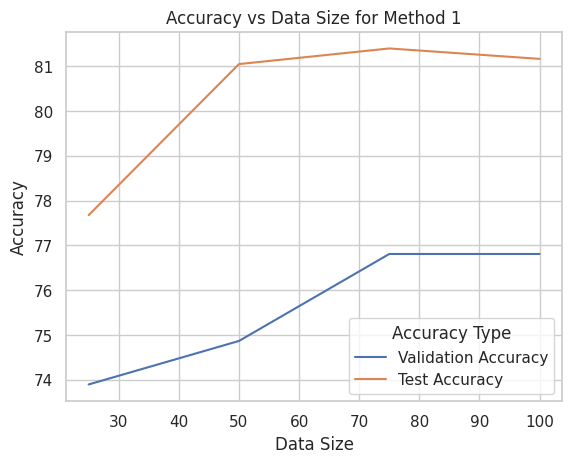

In [100]:
#Method 1
accuracy_plot(val_accuracy_list_1,test_accuracy_list_1, "Method 1")


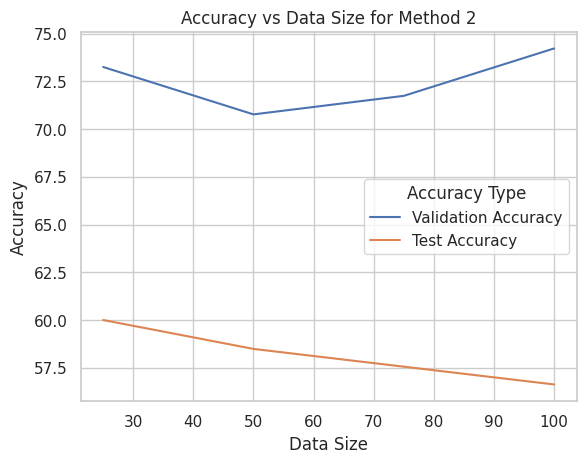

In [118]:
#Method 2
accuracy_plot(val_accuracy_list_2,test_accuracy_list_2, "Method 2")


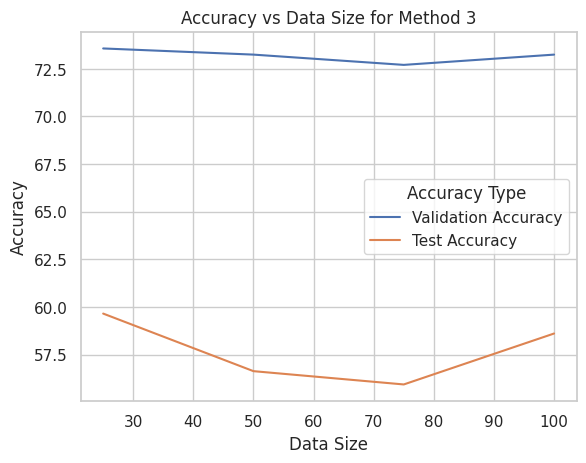

In [119]:
#Method 3
accuracy_plot(val_accuracy_list_3,test_accuracy_list_3, "Method 3")

In [128]:
test_accuracy_list_3

[59.651162790697676, 56.62790697674419, 55.93023255813954, 58.6046511627907]

In [1]:
val_accuracy_list_2

NameError: ignored